## EDA Data Analysis with Playstore Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('google_cleaned.csv')

In [4]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M14M8.7M25M2.8M5.6M19M29M33M3.1M28M12M20M21M...,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,19M14M8.7M25M2.8M5.6M19M29M33M3.1M28M12M20M21M...,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,19M14M8.7M25M2.8M5.6M19M29M33M3.1M28M12M20M21M...,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,19M14M8.7M25M2.8M5.6M19M29M33M3.1M28M12M20M21M...,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,19M14M8.7M25M2.8M5.6M19M29M33M3.1M28M12M20M21M...,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df = df.drop('Size',axis = 1)

In [6]:
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
df[df.duplicated('App')].shape

(1181, 13)

In [21]:
# To Drope Duplicate

df_drop = df.drop_duplicates(subset = ['App'],keep = 'first')

In [23]:
df_drop.shape

(9660, 13)

# Explore Data

In [28]:
num_feature = [feature for feature in df_drop.columns if df_drop[feature].dtype != 'O']
cat_feature = [feature for feature in df_drop.columns if df_drop[feature].dtype == 'O']

# Print Columns

print("We have to {} Numerical Features : {}".format(len(num_feature),num_feature))
print("We have to {} Categorical Features : {}".format(len(cat_feature),cat_feature))

We have to 3 Numerical Features : ['Unnamed: 0', 'Rating', 'Installs']
We have to 10 Categorical Features : ['App', 'Category', 'Reviews', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [34]:
# Praportional of Categorical Col

for col in cat_feature:
    print(df_drop[col].value_counts(normalize = True)*100)
    print('<--------------------------------------->')

App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010352
CK Pharmacies                                     0.010352
CK Call NEW                                       0.010352
Ck Coif                                           0.010352
CONTRACT KILLER: ZOMBIES                          0.010352
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010352
Dance School Stories - Dance Dreams Come True     0.010352
3D Bowling                                        0.010352
Mind Games Pro                                    0.010352
iHoroscope - 2018 Daily Horoscope & Astrology     0.010352
Name: proportion, Length: 9660, dtype: float64
<--------------------------------------->
Category
FAMILY                 18.964803
GAME                    9.927536
TOOLS                   8.561077
BUSINESS                4.347826
MEDICAL                 4.089027
PERSONALIZATION         3.892340
PRODUCTIVITY            3.871636
LIFESTYLE         

C:\Users\AM'sTUFFa15\AppData\Local\Temp\ipykernel_10752\1974094100.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df_drop[num_feature[i]],shade = True, color = 'r')
C:\Users\AM'sTUFFa15\AppData\Local\Temp\ipykernel_10752\1974094100.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df_drop[num_feature[i]],shade = True, color = 'r')


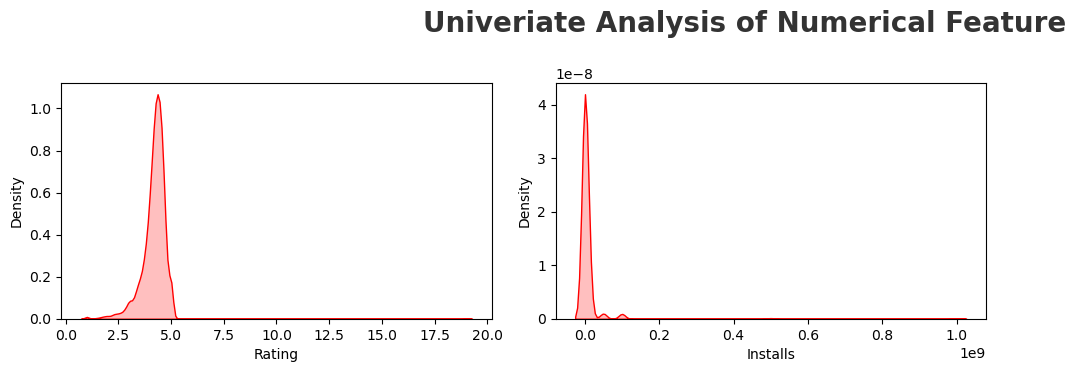

In [68]:
# Proporation of count data on numerical Col
plt.figure(figsize = (15,15))
plt.suptitle("Univeriate Analysis of Numerical Feature",fontsize = 20,fontweight = 'bold',alpha = 0.8,y = 1.)

for i in range(1,len(num_feature)):
    plt.subplot(5,3,i*1)
    sns.kdeplot(x = df_drop[num_feature[i]],shade = True, color = 'r')
    plt.xlabel(num_feature[i])
    plt.tight_layout()

C:\Users\AM'sTUFFa15\AppData\Local\Temp\ipykernel_10752\3804354554.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[categorical[i]],palette = "Set2")


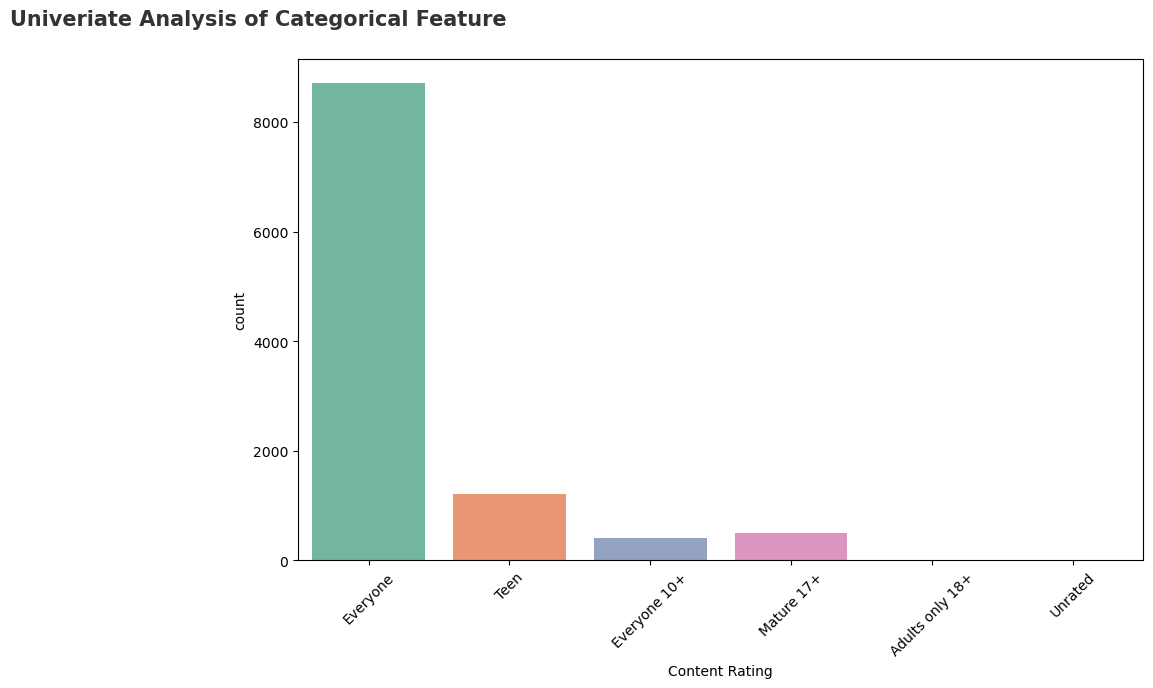

In [126]:
plt.figure(figsize = (18,12))
plt.suptitle("Univeriate Analysis of Categorical Feature",fontsize = 15,fontweight = 'bold',alpha = 0.8,y = 1.)
categorical = ['Type','Content Rating']
for i in range(1,len(categorical)):
    plt.subplot(2,2,i+1)
    sns.countplot(x = df[categorical[i]],palette = "Set2")
    plt.xlabel(categorical[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

In [128]:
# With Most App Categeoory
df_drop.head()

,Unnamed: 0,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<Axes: ylabel='count'>

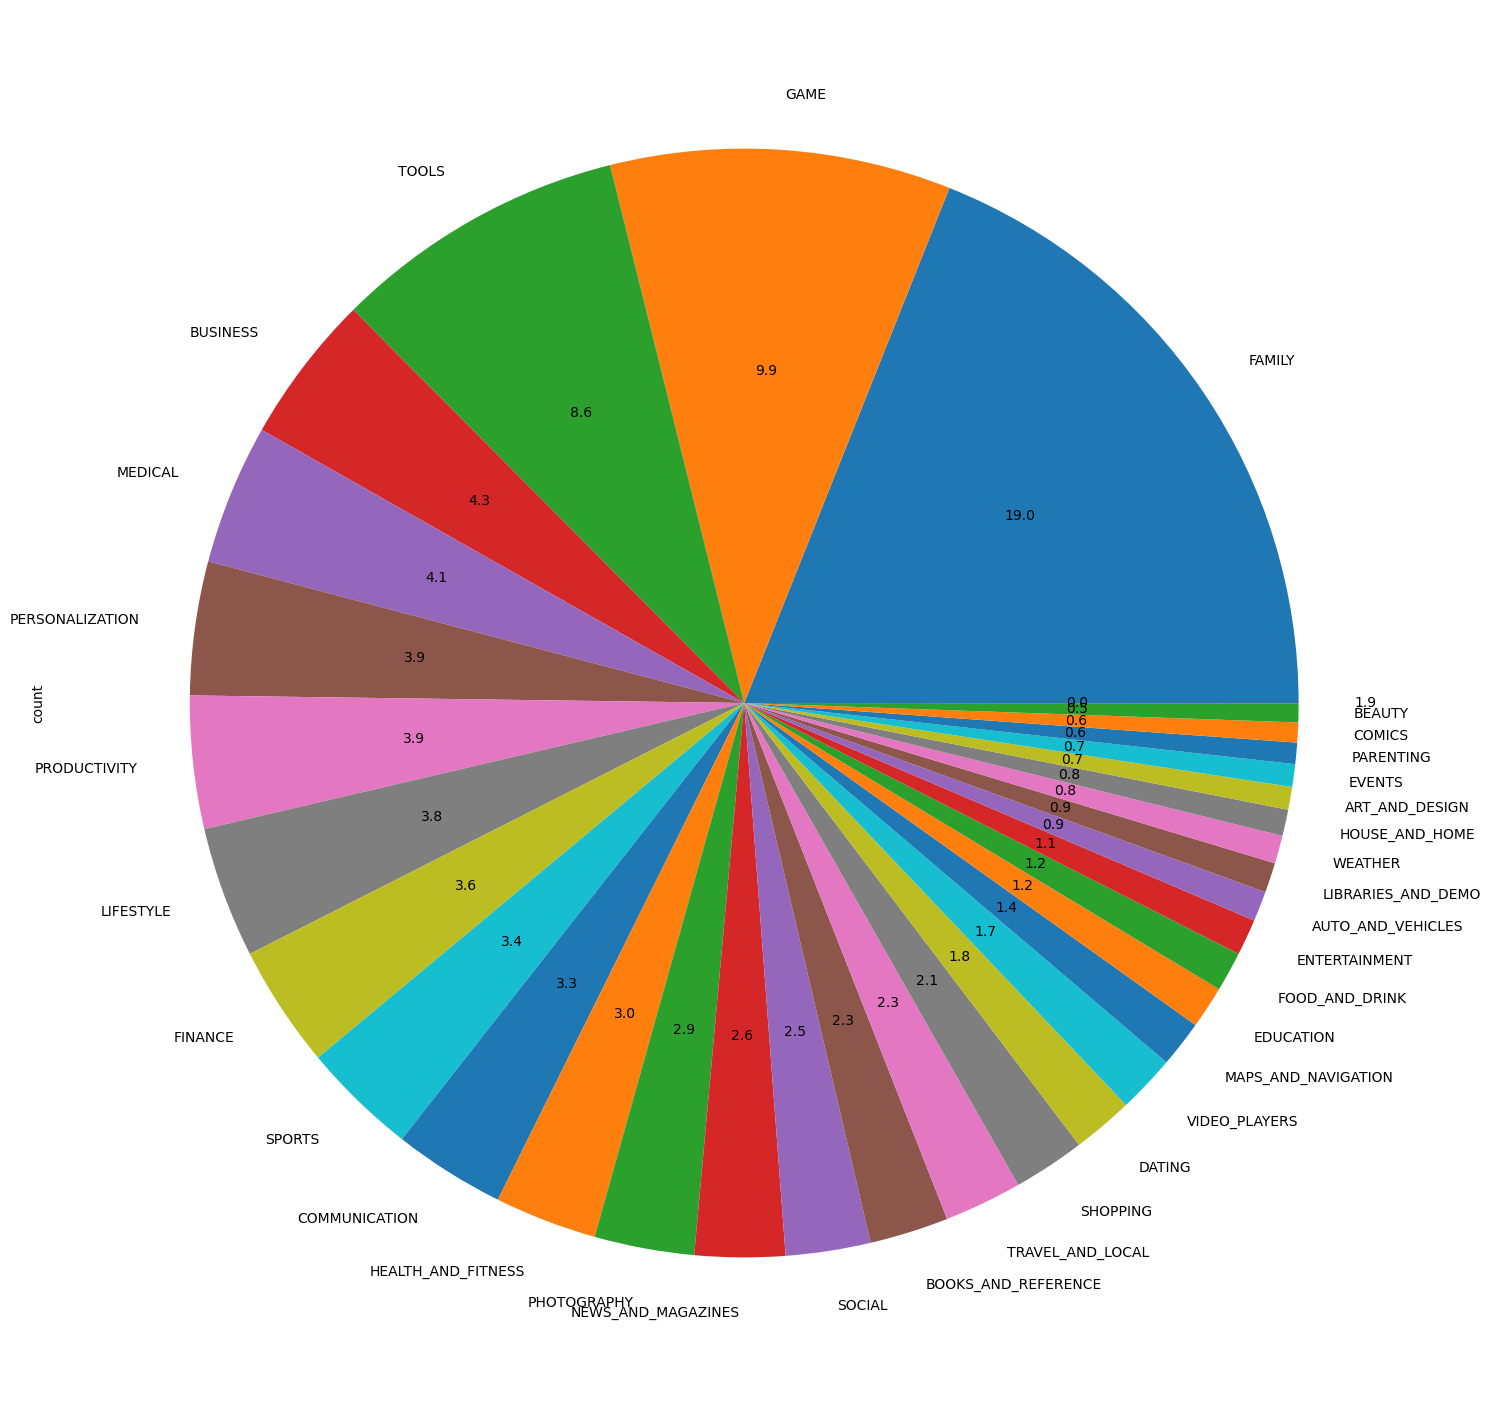

In [146]:
df_drop['Category'].value_counts().plot.pie(y = df_drop['Category'],figsize = (19,18),autopct = '%1.1f')

In [148]:
# Top 10 App Category

category = pd.DataFrame(df_drop['Category'].value_counts())
category.rename(columns = {'Category' : "Count"},inplace = True)

In [150]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


In [156]:
category.head(10)

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


C:\Users\AM'sTUFFa15\AppData\Local\Temp\ipykernel_10752\2006373206.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = category.index[:10], y ='count',data = category[:10],palette = 'hls')


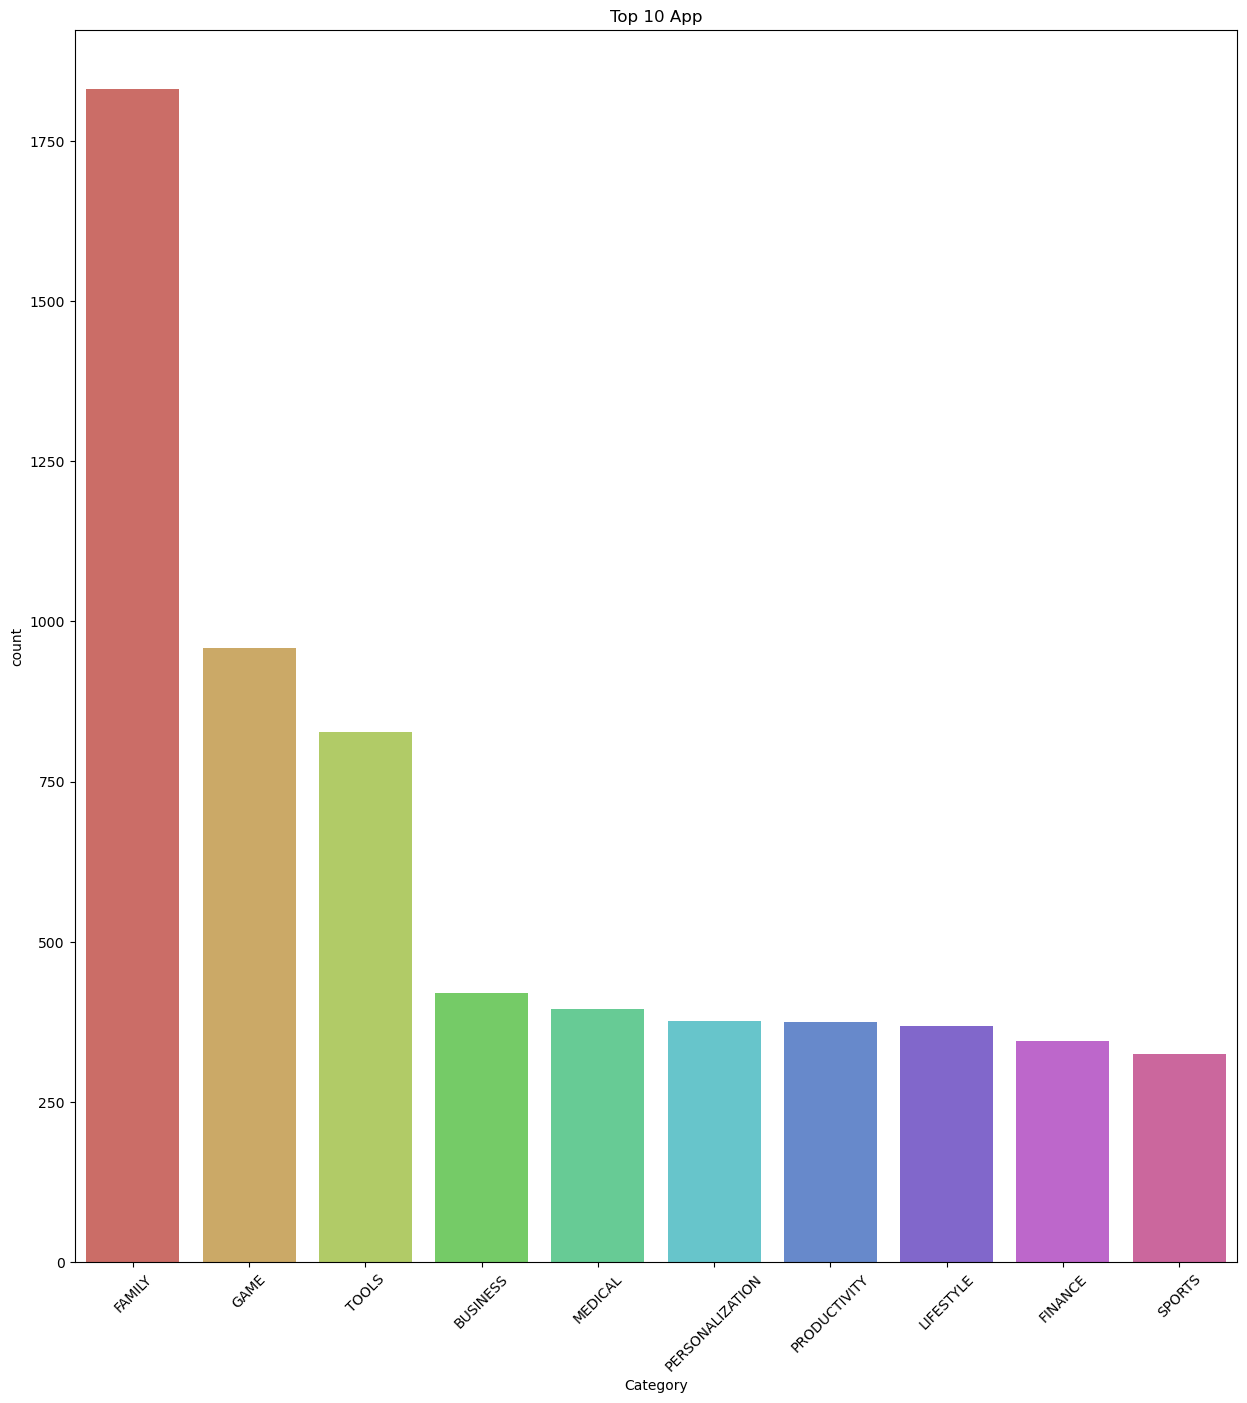

In [168]:
plt.figure(figsize = (15,16))
sns.barplot(x = category.index[:10], y ='count',data = category[:10],palette = 'hls')
plt.title("Top 10 App")
plt.xticks(rotation = 45)
plt.show()

In [226]:
installation = pd.DataFrame(df_drop['Installs'].value_counts())
installation.rename(columns = {'Installs' : "Count"},inplace = True)

In [228]:
installation.head(10)

,count
Installs,
1000000.0,1417
100000.0,1112
10000.0,1031
10000000.0,937
1000.0,888
100.0,710
5000000.0,607
500000.0,505
50000.0,469


C:\Users\AM'sTUFFa15\AppData\Local\Temp\ipykernel_10752\2179806846.py:2: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  sns.barplot(x = installation.index[:11], y ='count',data = installation[:10],palette = 'hls')
C:\Users\AM'sTUFFa15\AppData\Local\Temp\ipykernel_10752\2179806846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = installation.index[:11], y ='count',data = installation[:10],palette = 'hls')


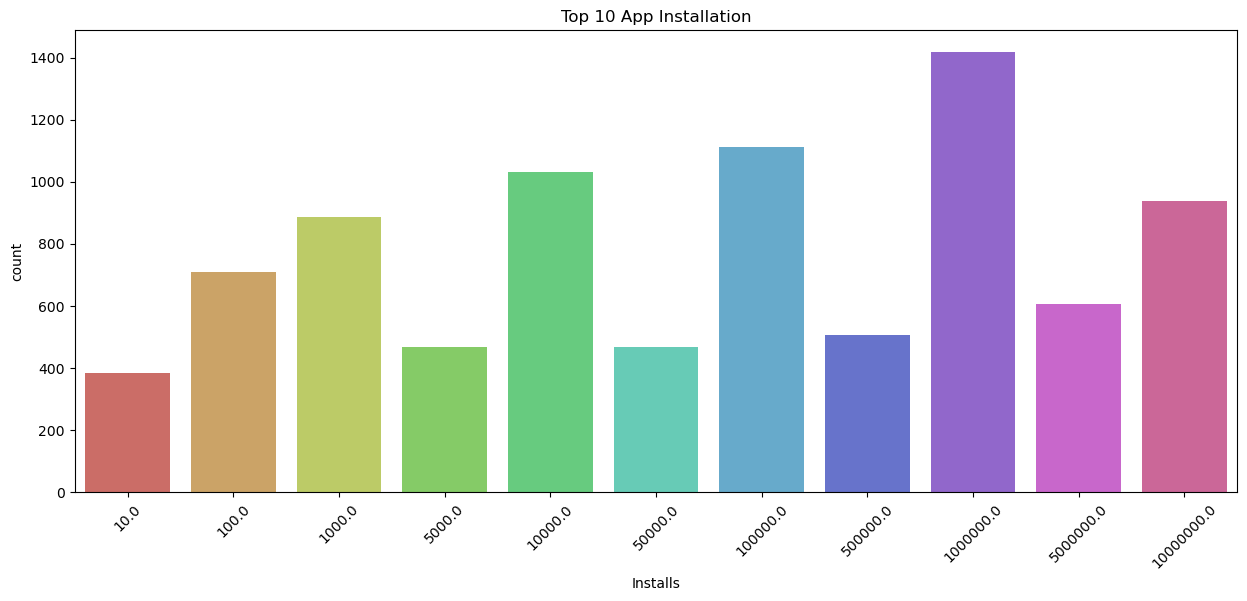

In [230]:
plt.figure(figsize = (15,6))
sns.barplot(x = installation.index[:11], y ='count',data = installation[:10],palette = 'hls')
plt.title("Top 10 App Installation")
plt.xticks(rotation = 45)
plt.show()